In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
header_list = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 
               'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

df = pd.read_csv('breast-cancer.csv',  names=header_list, na_values='?')
df = df.sample(frac=1)

In [5]:
df.head()

Class    age menopause tumor-size inv-nodes node-caps  \
222     recurrence-events  60-69      ge40      25-29       0-2        no   
50   no-recurrence-events  50-59      lt40      15-19       0-2        no   
76   no-recurrence-events  50-59      ge40      10-14       0-2        no   
89   no-recurrence-events  40-49   premeno      40-44       0-2        no   
242     recurrence-events  50-59      ge40      25-29       6-8        no   

     deg-malig breast breast-quad irradiat  
222          3   left   right_low      yes  
50           2   left    left_low       no  
76           2   left    left_low       no  
89           1  right     left_up       no  
242          3   left    left_low      yes

In [6]:
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, Birch, SpectralClustering, KMeans, DBSCAN
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, SparsePCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from kmodes.kmodes import KModes

In [7]:
df.shape

(286, 10)

In [10]:
df = df.dropna()

In [14]:
categorical_features = ['age', 'menopause', 'tumor-size', 'inv-nodes', 
               'node-caps', 'breast', 'breast-quad', 'irradiat']
numeric_features = ['deg-malig']

In [15]:
X, y = df[['age', 'menopause', 'tumor-size', 'inv-nodes', 
         'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']], df['Class']

y = LabelEncoder().fit_transform(y)

In [25]:
!pip install gower

In [23]:
import gower

In [24]:
distance_matrix = gower.gower_matrix(X)
distance_matrix

array([[0.        , 0.6111111 , 0.5       , ..., 0.5555556 , 0.7777778 ,
        0.5555556 ],
       [0.6111111 , 0.        , 0.22222222, ..., 0.3888889 , 0.5       ,
        0.2777778 ],
       [0.5       , 0.22222222, 0.        , ..., 0.2777778 , 0.3888889 ,
        0.2777778 ],
       ...,
       [0.5555556 , 0.3888889 , 0.2777778 , ..., 0.        , 0.6666667 ,
        0.22222222],
       [0.7777778 , 0.5       , 0.3888889 , ..., 0.6666667 , 0.        ,
        0.44444445],
       [0.5555556 , 0.2777778 , 0.2777778 , ..., 0.22222222, 0.44444445,
        0.        ]], dtype=float32)

In [48]:
from sklearn.cluster import DBSCAN

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(min_samples=2)

# Fitting the clustering algorithm
dbscan_cluster.fit(distance_matrix)

# Adding the results to a new column in the dataframe
df["cluster"] = dbscan_cluster.labels_

In [49]:
df['cluster'].value_counts()

-1     238
 11      3
 0       2
 17      2
 16      2
 15      2
 14      2
 13      2
 12      2
 10      2
 9       2
 8       2
 7       2
 6       2
 5       2
 4       2
 3       2
 2       2
 1       2
 18      2
Name: cluster, dtype: int64

In [176]:
df['Class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

In [177]:
df['N_Class'] = LabelEncoder().fit_transform(df['Class'])
df['N_Class'].value_counts()

0    201
1     85
Name: N_Class, dtype: int64

In [178]:
accuracy_score( df['N_Class'], df['cluster'] )

0.7202797202797203

## Distance Based clustering after using gower distance

In [91]:
clustering_models = [KMeans(n_clusters=2), Birch(n_clusters=2), SpectralClustering(n_clusters=2) ]


for i in clustering_models:
    print("\n")
    print(i)
    model = i

    model.fit_predict(distance_matrix)

    labels = model.labels_

    XX = distance_matrix

    print('Silhoutte Score', round(silhouette_score(XX, labels), 4) ) 
    print('Davies Boildin Score', round(davies_bouldin_score(XX, labels), 4) )
    print('Calinski Harabasz', round(calinski_harabasz_score(XX, labels), 4) )



KMeans(n_clusters=2)
Silhoutte Score 0.335
Davies Boildin Score 1.2941
Calinski Harabasz 119.0927


Birch(n_clusters=2)
Silhoutte Score 0.3039
Davies Boildin Score 1.438
Calinski Harabasz 111.6199


SpectralClustering(n_clusters=2)
Silhoutte Score 0.2875
Davies Boildin Score 1.224
Calinski Harabasz 59.0401


C:\Users\elsha\anaconda3\lib\site-packages\sklearn\cluster\_spectral.py:589: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


## KModes using Elbow

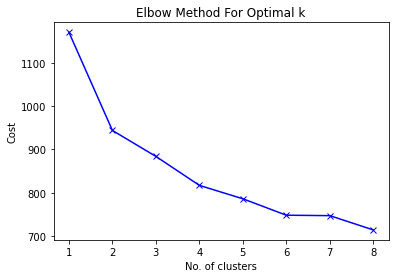

In [50]:
# Elbow curve to find optimal K
cost = []
K = range(1,9)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=False)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

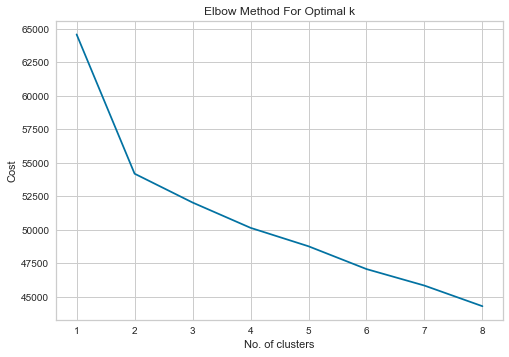

In [63]:
# Elbow curve to find optimal K
cost = []
K = range(1,9)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=False)
    kmode.fit_predict(distance_matrix)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')

plt.savefig('figures/elbow_kmodes.png')

plt.show()

In [ ]:
pipe = Pipeline(steps=[ 
    ('prepocessor', ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)), ('clustering', kmeans)])


# Elbow curve to find optimal K
cost = []
K = range(1,9)
for num_clusters in list(K):
#     kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=False)
    pipe.fit_predict(distance_matrix)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [56]:
!pip install yellowbrick

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\elsha\\anaconda3\\Lib\\site-packages\\numpy\\~ore\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



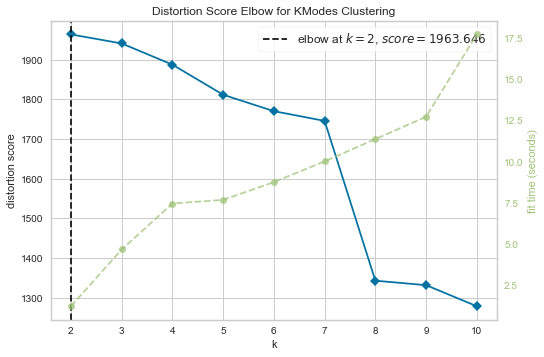

<AxesSubplot:title={'center':'Distortion Score Elbow for KModes Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
from yellowbrick.cluster import KElbowVisualizer

model = KElbowVisualizer(KModes(), k=10)
model.fit(distance_matrix)
model.show()

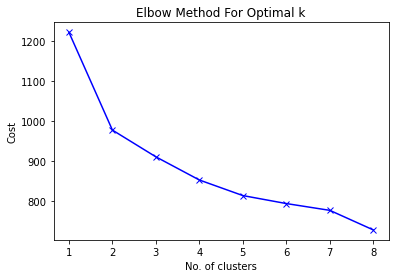

In [201]:
# Elbow curve to find optimal K
cost = []
K = range(1,9)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=False)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()